<a href="https://colab.research.google.com/github/MileneCV/sales_predictions/blob/main/9_29_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 1 -  Sales predictions 
Milene Carmes Vallejo




## Loading Data

In [129]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

filename = '/content/drive/My Drive/sales_predictions.csv'
df_sales = pd.read_csv(filename)

df_sales.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning


1 -  How many rows and columns?

In [130]:

print('rowns, columns')
df_sales.shape

rowns, columns


(8523, 12)

2 - What are the datatypes of each variable

In [131]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3- Are there duplicates? If so, drop any duplicates

In [132]:
check_duplicate = df_sales.duplicated().sum()
if check_duplicate == 0:
  print('no duplicate')
else:
  print(f'(there are {check_duplicate} duplicates')


no duplicate


4 - Identify missing values.


In [133]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [134]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [135]:
# mean of item_weight is 12.85 but is better to check if there are big difference between "item_type"
df_sales.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [136]:
# no big difference between 'item_type'
# next step fill nan with 'item_weight' mean  
average_weight = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'].fillna(average_weight, inplace = True)
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [137]:
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [138]:
# no big difference btweeenn medium and small,  so it is better fill nan with 'Missing'
df_sales['Outlet_Size'].fillna('Missing', inplace = True)


 6 - Confirm that there are no missing values after addressing them.

In [139]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 7 - Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

In [140]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [141]:
# this code will fiter out the object type columns and creates a list of each of column names as an index
df_sales_types = df_sales.dtypes
str_cols = df_sales_types[df_sales_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [142]:
# This for loop prints out each column name and then lists each category
# in the column along with the counts of each category
for col in str_cols:
  print(f'- {col}:')
  print(df_sales[col].value_counts(dropna=False))
  print('\n')


- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


In [143]:
# something is wrong with "Item_fat_content"
# replace to be 2 type : Low Fat and Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF', 'Low Fat')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8 - For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [144]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

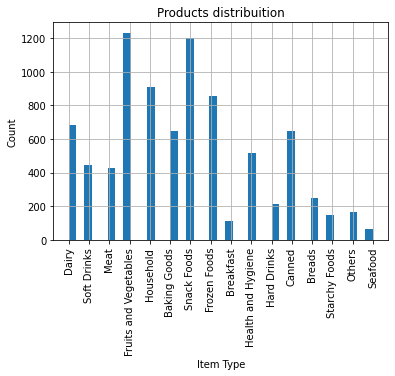

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# check types of products 

df_sales['Item_Type'].hist(bins='auto')
plt.xlabel('Item Type')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Products distribuition')
plt.show()

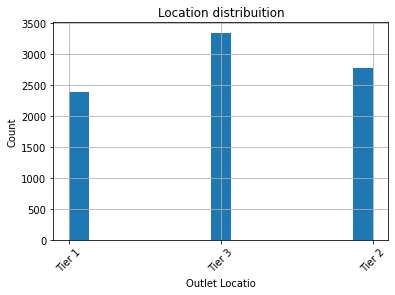

In [146]:
# check outlets locations
df_sales['Outlet_Location_Type'].hist(bins='auto')
plt.xlabel('Outlet Locatio')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.title('Location distribuition')
plt.show()


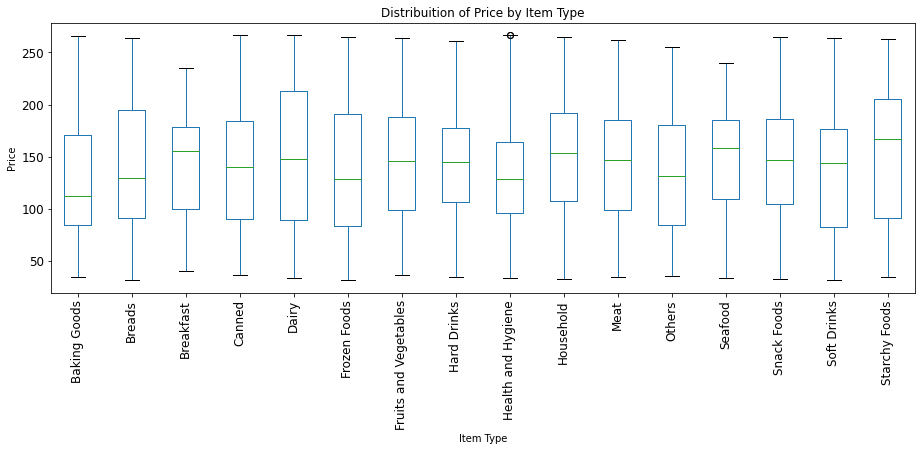

In [157]:
# check prices by type of products 
df_sales.boxplot(['Item_MRP'], by= 'Item_Type', figsize = (15,5), fontsize = 12, rot=90,grid=False); 
plt.xlabel('Item Type');
plt.ylabel('Price');
plt.title('Distribuition of Price by Item Type');
plt.suptitle('');
plt.show()

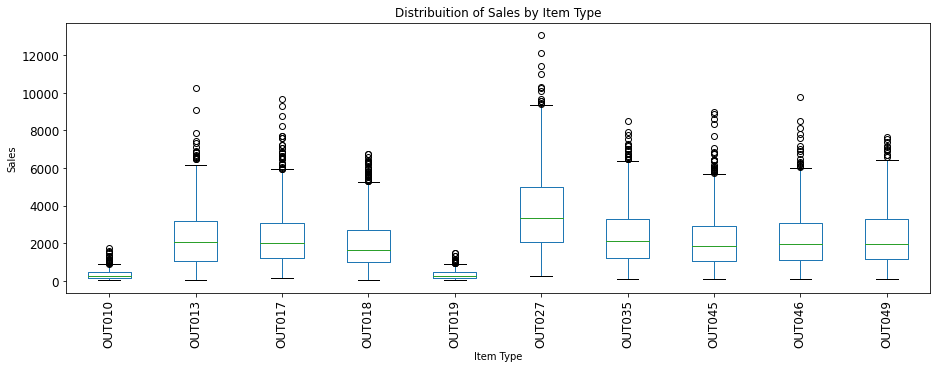

In [148]:
# check outlets with better sales number
df_sales.boxplot(['Item_Outlet_Sales'], by= 'Outlet_Identifier', figsize = (15,5), fontsize = 12, rot=90,grid=False); 
plt.xlabel('Item Type');
plt.ylabel('Sales');
plt.title('Distribuition of Sales by Item Type');
plt.suptitle('');
plt.show()

In [149]:
# check if bigger store has better sales 

size_sales = df_sales.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()
size_sales


Outlet_Size
High       2298.995256
Medium     2681.603542
Missing    1822.626947
Small      1912.149161
Name: Item_Outlet_Sales, dtype: float64

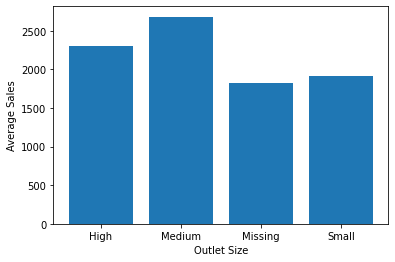

In [150]:
plt.bar(size_sales.index, size_sales.values)
plt.ylabel('Average Sales')
plt.xlabel('Outlet Size')
plt.show()

In [151]:
# check the average of price in different size store 
size_price = df_sales.groupby('Outlet_Size')['Item_MRP'].mean()
size_price


Outlet_Size
High       141.425982
Medium     140.590514
Missing    140.322946
Small      141.970209
Name: Item_MRP, dtype: float64

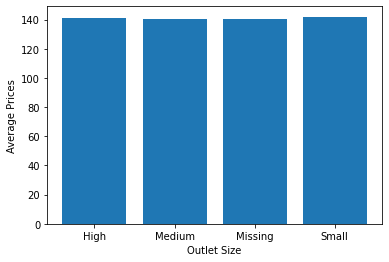

In [152]:
plt.bar(size_price.index, size_price.values)
plt.ylabel('Average Prices')
plt.xlabel('Outlet Size')
plt.show()

In [153]:
# check location of outlet and sales 

location_sales = df_sales.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
location_sales



Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

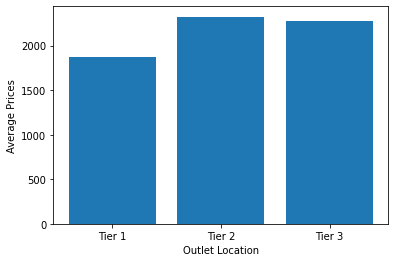

<Figure size 36x36 with 0 Axes>

In [154]:
plt.bar(location_sales.index, location_sales.values)
plt.ylabel('Average Prices')
plt.xlabel('Outlet Location')
plt.figure(figsize=(0.5, 0.5))
plt.show()

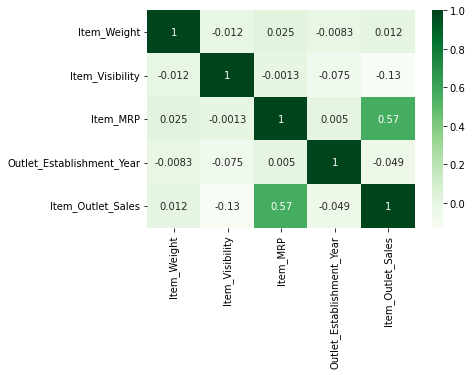

In [155]:
corr = df_sales.corr()
sns.heatmap(corr,cmap='Greens', annot=True)

## Explanatory Visuals